单变量:表达式、方程式、函数或者一元多项式等

网址：http://www.presidency.ucsb.edu/data/sourequests.php  
美国总统历年在国情咨文中对国会提起的诉求数量

## 获取数据

In [1]:
import urllib.request
import re


def crawler(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (X11; U; Linux x86_64; zh-CN; rv:1.9.2.10) Gecko/20100922 Ubuntu/10.10 (maverick) Firefox/3.6.10"
    }
    req = urllib.request.Request(url, headers=headers)
    response = urllib.request.urlopen(req)
    
    html = response.read().decode('utf-8')
    print(type(html))
    
    pat = r'<tr align="center">(.*?)</tr>'
    re_html = re.compile(pat, re.S) # re.S可以使匹配换行
    trslist = re_html.findall(html) # 匹配出每条信息的数据
    
    x = []
    y = []
    for tr in trslist:
        re_i = re.compile(r'<div align="center">(.*?)</div>', re.S)
        i = re_i.findall(tr)
        x.append(int(i[1].strip())) # 从每条数据中取出所需要的两个数据年份和诉求数量
        y.append(int(i[2].strip()) if i[2] != '' else 0) # 当匹配到空字符串时就是数据缺失部分，用0代替
    print(x,y) # 查看结果发现第一组和第四组数据有误，看源码发现他们两个的分类名不是使用的center标签，为了简便，手动添加这两个数据
    x[0] = 1946
    y[0] = 41
    x[3] = 1949
    y[3] = 28
    return x, y
    
url = "http://www.presidency.ucsb.edu/data/sourequests.php"
x, y = crawler(url)

<class 'str'>
[41, 1947, 1948, 28, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997] [16, 23, 16, 17, 20, 11, 19, 14, 39, 32, 0, 14, 0, 16, 6, 25, 24, 18, 17, 38, 31, 27, 26, 17, 21, 20, 17, 23, 16, 13, 13, 21, 11, 13, 11, 8, 8, 14, 9, 7, 5, 5, 54, 34, 18, 20, 27, 30, 22, 25, 19, 26]


## 绘制图形观察趋势

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import frange

Text(0,0.5,'No Presedential Request')

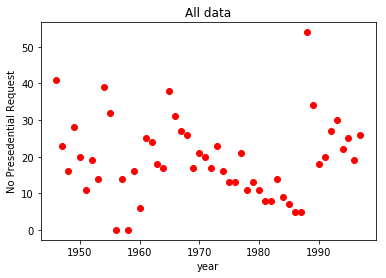

In [3]:
plt.figure(1)
plt.title("All data")
plt.plot(x, y, 'ro')
plt.xlabel('year')
plt.ylabel('No Presedential Request')

## 计算出百分位数，并绘制在图中

In [4]:
perc_25 = np.percentile(y, 25)
perc_50 = np.percentile(y, 50)
perc_75 = np.percentile(y, 75)
print("25th Percentile = %.2f" % perc_25)
print("50th Percentile = %.2f" % perc_50)
print("75th Percentile = %.2f" % perc_75)

25th Percentile = 13.00
50th Percentile = 18.50
75th Percentile = 25.25


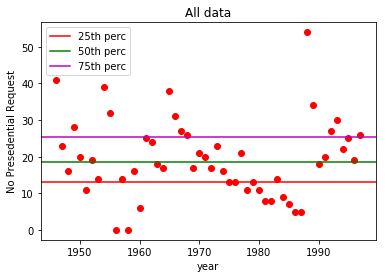

In [5]:
# 在图中画出第25、50、75位的百分位水平线
# ----------------------------------------
plt.figure(1)
plt.title("All data")
plt.plot(x, y, 'ro')
plt.xlabel('year')
plt.ylabel('No Presedential Request')
# ----------------------------------------
plt.axhline(perc_25, label='25th perc', c='r')
plt.axhline(perc_50, label='50th perc', c='g')
plt.axhline(perc_75, label='75th perc', c='m')
plt.legend(loc='best')

## 检查异常点

In [6]:
# 检查生成的图形中是否有异常点，若有，使用mask函数将其删除
# 0是在起初获取数据时候的缺失值的填充，根据图像看到y=54的点远远高出其他，也按异常值处理
y = np.array(y) # 起初发现y为0的点没有被删掉，考虑到他是对数组进行隐藏，而本来的y是个列表，因此又加了这一句，果然去掉了两个零点
y_masked = np.ma.masked_where(y==0, y)
y_masked = np.ma.masked_where(y_masked==54, y_masked)
print(type(y),type(y_masked))

<class 'numpy.ndarray'> <class 'numpy.ma.core.MaskedArray'>


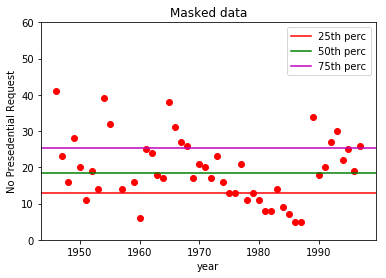

In [7]:
# 重新绘制图像
plt.figure(2)
plt.title("Masked data")
plt.plot(x, y_masked, 'ro')
plt.xlabel('year')
plt.ylabel('No Presedential Request')
plt.ylim(0, 60)

# 在图中画出第25、50、75位的百分位的水平线
plt.axhline(perc_25, label='25th perc', c='r')
plt.axhline(perc_50, label='50th perc', c='g')
plt.axhline(perc_75, label='75th perc', c='m')
plt.legend(loc='best')
plt.show()

## 知识点

### plot

plt.close('all') # 关闭之前打开的所有图形  
plt.figure(1) # 给图形编号，在绘制多个图形的时候有用  
plt.title('All data') # 设置标题  
plt.plot(x, y, 'ro') # "ro" 表示使用红色（r）的点（o）来绘图

### 百分位数

百分位数：  
一组n个观测值按数值大小排列。如，处于p%位置的值称第p百分位数。p=50，等价于中位数；p=0，等价于最小值；p=100，等价于最大值。

### plt.axhline()

plt.axhline()  
给定y的位置，从x的最小值一直画到x的最大值  
label设置名称  
c参数设置线条颜色  
eg：perc_25 = 13.00  
plt.axhline(perc_25, label='25th perc', c='r')

### legend(loc)

plt.legend() 是将图中线条的名称（label）和一些标签显示出来  
loc参数让pyplot决定最佳放置位置，以免影响读图

### numpy-mask函数

删除异常点  
y_masked = np.ma.masked_where(y==0, y)  
ma.masked_where函数接受两个参数，他将数组中符合条件的点进行隐藏，而不需要删除